In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

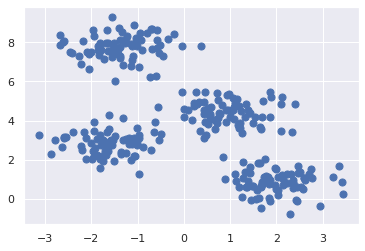

In [3]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=300, centers=4,
                 cluster_std = .6, random_state=0)
plt.scatter(x[:, 0], x[:,1], s=50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

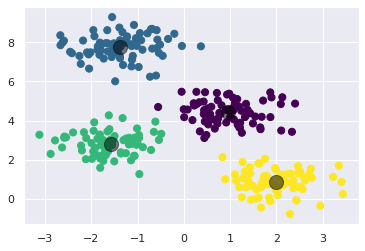

In [5]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);